# Install and Import Required Libraries

In [1]:
# Ensure scikit-learn is up-to-date
# !pip install --upgrade scikit-learn

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tqdm import tqdm
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
)
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configure pandas to display all columns
pd.set_option("display.max_columns", 500)

# Import the Feature-Engineered Dataset

We load the **feature-engineered dataset** from the previous **EDA, Feature Selection, and Feature Engineering** steps. This dataset includes:
- **Preprocessed numerical and categorical features** for modeling.
- **Encoded genre, language, and keyword features**.
- **TrueSkill-based rankings** for production companies and actors.

In [3]:
# Load the processed dataset from EDA, Feature Selection, and Feature Engineering
df_anim_model = pd.read_csv("animated_movies_dataset.csv")
df_anim_model.head(5)

,id,title,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,release_year,production_companies_list,credits_list,quarter_q1,quarter_q2,quarter_q3,quarter_q4,release_quarter,real_budget,real_revenue,"Science Fiction, Family","Action, Comedy, Adventure, Family","Fantasy, Adventure, Comedy, Family",genre_other,original_language_en,original_language_ja,original_language_other,companies_trueskill,credits_trueskill,split_keywords,clean_keywords,duringcreditsstinger,aftercreditsstinger,sequel,anthropomorphism,friendship,cartoon,anime,animal,villain,family,superhero,dog
0,15655,The Tigger Movie,Winnie the Pooh Piglet Owl Kanga Roo and Rabbi...,20.167,Walt Disney Pictures-Disney Television Animati...,2000-02-11,30000000.0,45554533.0,77.0,Released,NaN,6.500,487.0,Jim Cummings-Ken Sansom-John Fiedler-Peter Cul...,woman director,/lxuiGvLHIL1ZyePP7bn6FcKj0Mr.jpg,/uMoSM7r4dst4e5aFUhDEDPyh1hL.jpg,13691-13682-13706-16394-27332-14885-326911-511...,2000,"['Walt Disney Pictures', 'Disney Television An...","['Jim Cummings', 'Ken Sansom', 'John Fiedler',...",1,0,0,0,Q1,6.281334e+07,9.538108e+07,0,0,0,1,1,0,0,25.000000,25.000000,['woman director'],['woman director'],0,0,0,0,0,0,0,0,0,0,0,0
1,20455,Digimon: The Movie,The first story focused on Tai and Kari Kamiya...,13.017,Saban Entertainment-Toei Company-Fox Family Fi...,2000-03-04,5500000.0,16600000.0,89.0,Released,New Monsters. New Battles. Now on the Big Screen.,6.600,243.0,Lara Jill Miller-Joshua Seth-Bob Papenbrook-Da...,video game-monster-loss of energy-computer-sup...,/1MpgVWRCdWEgu9qZivyNX4glDe.jpg,/1ZFUt0LtYkF568iCkRXCScgBP5g.jpg,97787-75571-12599-98299-10228-10991-36201-8873...,2000,"['Saban Entertainment', 'Toei Company', 'Fox F...","['Lara Jill Miller', 'Joshua Seth', 'Bob Papen...",1,0,0,0,Q1,1.151578e+07,3.475671e+07,1,0,0,0,0,1,0,25.000000,25.000000,"['video game', 'monster', 'loss of energy', 'c...","['video game', 'monster', 'loss of energy', 'c...",0,0,0,0,0,0,1,0,0,0,1,0
2,10501,The Road to El Dorado,After a failed swindle two con-men end up with...,41.768,DreamWorks Animation-DreamWorks Pictures,2000-03-31,95000000.0,76432727.0,89.0,Released,They came for the gold. They stayed for the ad...,7.242,3354.0,Kenneth Branagh-Kevin Kline-Rosie Perez-Armand...,gold-horse-musical-cartoon-sword fight-con art...,/ryXm7xp4aqQyda0FU2eMfHehPBg.jpg,/ciID0Mu1pPuOUP3JbOsDXQ5aMV6.jpg,10865-8916-10009-9837-9444-14411-11688-9023-90...,2000,"['DreamWorks Animation', 'DreamWorks Pictures']","['Kenneth Branagh', 'Kevin Kline', 'Rosie Pere...",1,0,0,0,Q1,1.989089e+08,1.600332e+08,0,0,1,0,1,0,0,25.000000,8.097407,"['gold', 'horse', 'musical', 'cartoon', 'sword...","['gold', 'horse', 'musical', 'cartoon', 'sword...",0,0,0,0,0,1,0,0,0,0,0,0
3,10567,Dinosaur,An orphaned dinosaur raised by lemurs joins an...,62.622,Walt Disney Pictures-Walt Disney Feature Anima...,2000-05-19,127500000.0,354248063.0,82.0,Released,Discover a world you've only imagined.,6.534,2455.0,D.B. Sweeney-Alfre Woodard-Ossie Davis-Max Cas...,cataclysm-asteroid-leader-villain-comet-migrat...,/rSje3FS7ycJSglowlngjsvDt7vO.jpg,/laeEtakR2pLKu3CeRwB2lU5Y53X.jpg,12129-7443-11688-10865-13691-49948-15655-12233...,2000,"['Walt Disney Pictures', 'Walt Disney Feature ...","['D.B. Sweeney', 'Alfre Woodard', 'Ossie Davis...",0,1,0,0,Q2,2.669567e+08,7.417168e+08,0,0,0,1,1,0,0,13.014667,25.000000,"['cataclysm', 'asteroid', 'leader', 'villain',...","['cataclysm', 'asteroid', 'leader', 'villain',...",0,0,0,0,0,0,0,0,1,0,0,0
4,7450,Titan A.E.,A young man finds out that he holds the key to...,19.759,20th Century Fox-David Kirschner Productions-F...,2000-06-16,75000000.0,36754634.0,94.0,Released,"When Earth Ends, The Adventure Begins.",6.609,916.0,Matt Damon-Bill Pullman-Drew Barrymore-John Le...,monster-galaxy-dystopia-space-alien-mission,/el2iHk3LTJWfEnwrvcRkvWY501G.jpg,/pniACHS8KDVCldB3BlwL78RIZ7V.jpg,9016-14411-2114-9837-10016-2157

In [4]:
# Display all column names
df_anim_model.columns

Index(['id', 'title', 'overview', 'popularity', 'production_companies',
       'release_date', 'budget', 'revenue', 'runtime', 'status', 'tagline',
       'vote_average', 'vote_count', 'credits', 'keywords', 'poster_path',
       'backdrop_path', 'recommendations', 'release_year',
       'production_companies_list', 'credits_list', 'quarter_q1', 'quarter_q2',
       'quarter_q3', 'quarter_q4', 'release_quarter', 'real_budget',
       'real_revenue', 'Science Fiction, Family',
       'Action, Comedy, Adventure, Family',
       'Fantasy, Adventure, Comedy, Family', 'genre_other',
       'original_language_en', 'original_language_ja',
       'original_language_other', 'companies_trueskill', 'credits_trueskill',
       'split_keywords', 'clean_keywords', 'duringcreditsstinger',
       'aftercreditsstinger', 'sequel', 'anthropomorphism', 'friendship',
       'cartoon', 'anime', 'animal', 'villain', 'family', 'superhero', 'dog'],
      dtype='object')

# Classifying Revenue

In [5]:
df_anim_model["success"] = (df_anim_model["real_revenue"] >= 2.5 * df_anim_model["real_budget"]).astype(int)

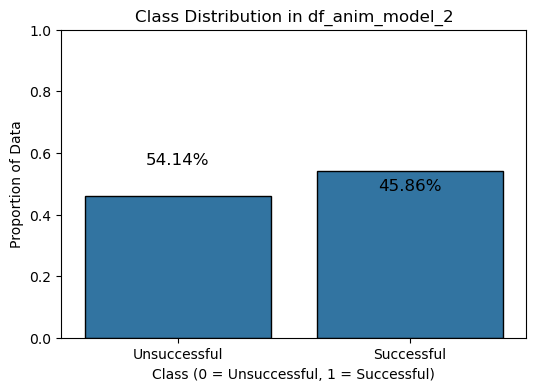

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get class distribution
class_counts = df_anim_model["success"].value_counts(normalize=True)

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, edgecolor="black")

# Add labels
plt.xlabel("Class (0 = Unsuccessful, 1 = Successful)")
plt.ylabel("Proportion of Data")
plt.title("Class Distribution in df_anim_model_2")
plt.xticks(ticks=[0, 1], labels=["Unsuccessful", "Successful"])
plt.ylim(0, 1)

# Display percentages on bars
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.02, f"{value:.2%}", ha="center", fontsize=12)

plt.show()


# Train-Test Split: Rolling Window Method

**Why Use a Rolling Window Split?**
- Traditional **random train-test splits** do not account for the **time-based nature** of movie releases.
- A **rolling window** approach ensures that the **model is trained on past data** and tested on **future data**, mimicking real-world forecasting.
- **Rolling window maintains a fixed training size**, preventing older, less relevant data from influencing the model.
- **Preferred over expanding window because it prevents outdated patterns from diluting recent trends, ensuring the model adapts to changing industry dynamics.**

**How the Rolling Window Works**
1. **Train on a fixed number of years (e.g., 5 years)**.
2. **Test on the next year**.
3. **Slide the window forward by one year** and repeat until reaching the dataset’s end.

**Why the Elbow Method?**
- The **train window size (number of years)** affects performance.
- A smaller window captures recent trends but loses long-term context.
- A larger window provides more data but might include outdated patterns.
- The **elbow method** helps determine an **optimal balance** by plotting RMSE vs. train window size.


In [7]:
# Create a working copy of the dataset
df_anim_model_2 = df_anim_model.copy()

In [8]:
# Define columns to drop (ID, textual data, redundant features)
cols_to_drop = [
    "id", "overview", "production_companies", "popularity", "budget", "revenue",
    "credits", "keywords", "status", "tagline", "vote_average", "vote_count",
    "production_companies_list", "credits_list", "poster_path", "backdrop_path",
    "recommendations", "release_year", "release_quarter", "split_keywords", "clean_keywords",
]

# Drop specified columns
df_anim_model_2 = df_anim_model_2.drop(labels=cols_to_drop, axis=1)

# Display first two rows to confirm changes
df_anim_model_2.head(2)

,title,release_date,runtime,quarter_q1,quarter_q2,quarter_q3,quarter_q4,real_budget,real_revenue,"Science Fiction, Family","Action, Comedy, Adventure, Family","Fantasy, Adventure, Comedy, Family",genre_other,original_language_en,original_language_ja,original_language_other,companies_trueskill,credits_trueskill,duringcreditsstinger,aftercreditsstinger,sequel,anthropomorphism,friendship,cartoon,anime,animal,villain,family,superhero,dog,success
0,The Tigger Movie,2000-02-11,77.0,1,0,0,0,6.281334e+07,9.538108e+07,0,0,0,1,1,0,0,25.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Digimon: The Movie,2000-03-04,89.0,1,0,0,0,1.151578e+07,3.475671e+07,1,0,0,0,0,1,0,25.0,25.0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [9]:
# Display remaining column names
df_anim_model_2.columns

Index(['title', 'release_date', 'runtime', 'quarter_q1', 'quarter_q2',
       'quarter_q3', 'quarter_q4', 'real_budget', 'real_revenue',
       'Science Fiction, Family', 'Action, Comedy, Adventure, Family',
       'Fantasy, Adventure, Comedy, Family', 'genre_other',
       'original_language_en', 'original_language_ja',
       'original_language_other', 'companies_trueskill', 'credits_trueskill',
       'duringcreditsstinger', 'aftercreditsstinger', 'sequel',
       'anthropomorphism', 'friendship', 'cartoon', 'anime', 'animal',
       'villain', 'family', 'superhero', 'dog', 'success'],
      dtype='object')

In [10]:
# Display feature data types
df_anim_model_2.dtypes

title                                  object
release_date                           object
runtime                               float64
quarter_q1                              int64
quarter_q2                              int64
quarter_q3                              int64
quarter_q4                              int64
real_budget                           float64
real_revenue                          float64
Science Fiction, Family                 int64
Action, Comedy, Adventure, Family       int64
Fantasy, Adventure, Comedy, Family      int64
genre_other                             int64
original_language_en                    int64
original_language_ja                    int64
original_language_other                 int64
companies_trueskill                   float64
credits_trueskill                     float64
duringcreditsstinger                    int64
aftercreditsstinger                     int64
sequel                                  int64
anthropomorphism                  

In [11]:
# Features used for modeling
features = df_anim_model_2.drop(["title", "release_date", "real_revenue", 
                                 "success", "quarter_q4", "genre_other",
                                 "original_language_other"], axis=1).columns.to_list()

# Target variable
target = ["success"]

In [12]:
# Convert release_date column to datetime
df_anim_model_2["release_date"] = pd.to_datetime(df_anim_model_2["release_date"], errors="coerce")

# Get dataset time range
earliest_date = df_anim_model_2["release_date"].min()
latest_date = df_anim_model_2["release_date"].max()

# Display the earliest and latest release dates
print(f"Earliest release date: {earliest_date}")
print(f"Latest release date: {latest_date}")

Earliest release date: 2000-02-11 00:00:00
Latest release date: 2024-06-20 00:00:00


# Baseline

**Why Use a Linear Regression Baseline?**  
- Provides a **data-driven benchmark** for revenue prediction.  
- Helps assess whether **more complex models** significantly improve accuracy.  
- Captures relationships between **budget, features, and revenue**.  
- More adaptable than simple rules like **fixed multipliers (e.g., 2.5× budget)**.

**How the Linear Regression Baseline Works**  
1. **Train a Linear Regression model** using historical movie features.  
2. **Predict revenue** based on input features.  
3. **Evaluate performance** using MAE, RMSE, R², and MAPE.  
4. **Compare against rule-based baselines** to determine added value.  

---

**Why Use a 2.5× Budget Baseline?**  
- Represents a **common industry heuristic** for animated movies.  
- Quick and interpretable: does not require model training.  
- Serves as a **sanity check**: if ML models don’t outperform it, they may lack real predictive power.  

**How the 2.5× Budget Baseline Works**  
1. Compute **Estimated Revenue** as `2.5 × Budget`.  
2. Compare **predicted vs. actual revenue** using MAE and RMSE.  
3. Use it as a **lower-bound benchmark**: a good ML model should outperform this simple assumption.  


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
from tqdm import tqdm

# Define Stratified K-Fold (ensures similar class distribution in each fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare data
X = df_anim_model_2[features]
y = df_anim_model_2["success"]

# Initialize results dictionary
results = {"Accuracy": [], "F1 Score": [], "Precision": [], "Recall": []}

# Loop over K-Fold splits with tqdm for progress tracking
for fold, (train_index, test_index) in enumerate(tqdm(kf.split(X, y), desc="K-Fold Progress", total=kf.get_n_splits())):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train baseline classifier
    dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)

    # Compute classification metrics
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["F1 Score"].append(f1_score(y_test, y_pred, zero_division=0))
    results["Precision"].append(precision_score(y_test, y_pred, zero_division=0))
    results["Recall"].append(recall_score(y_test, y_pred, zero_division=0))

# Compute the average of each metric
average_metrics = {metric: np.mean(values) for metric, values in results.items()}

# Print the results
print("\nBaseline Model (Dummy Classifier) Performance:")
print(f"Average Accuracy: {average_metrics['Accuracy']:.4f}")
print(f"Average F1 Score: {average_metrics['F1 Score']:.4f}")
print(f"Average Precision: {average_metrics['Precision']:.4f}")
print(f"Average Recall: {average_metrics['Recall']:.4f}")

# Store results in DataFrame for further analysis
df_baseline_results = pd.DataFrame(results)
print("\nDetailed Performance Across K-Fold Splits:")
print(df_baseline_results)


K-Fold Progress: 100%|██████████| 5/5 [00:00<00:00, 82.52it/s]


Baseline Model (Dummy Classifier) Performance:
Average Accuracy: 0.5063
Average F1 Score: 0.5231
Average Precision: 0.5484
Average Recall: 0.5000

Detailed Performance Across K-Fold Splits:
   Accuracy  F1 Score  Precision    Recall
0  0.476190  0.492308   0.516129  0.470588
1  0.444444  0.461538   0.483871  0.441176
2  0.571429  0.584615   0.612903  0.558824
3  0.539683  0.553846   0.580645  0.529412
4  0.500000  0.523077   0.548387  0.500000


# Model

## Initial Selection

**Why Use Tree-Based Models?**
- The dataset is primarily **categorical**, making tree-based models a natural choice.
- Tree-based algorithms handle **categorical splits** efficiently without requiring extensive preprocessing.
- Ensemble methods like **Random Forest, XGBoost, and CatBoost** improve performance by reducing variance and capturing non-linear relationships.

**Models Being Evaluated**
1. **Decision Tree Regressor**:  
   - A simple, interpretable model that creates hierarchical decision rules.
2. **Random Forest Regressor**:  
   - An ensemble of decision trees that improves generalization and reduces overfitting.
3. **XGBoost Regressor**:  
   - A gradient boosting method optimized for speed and performance.
4. **CatBoost Regressor**:  
   - Specifically designed for categorical data, requiring minimal preprocessing.

**How Model Selection Works**
1. **Train Each Model Using Rolling Window Splits**:  
   - Ensures evaluation is time-aware, mimicking real-world forecasting.
2. **Compute Performance Metrics**:  
   - **Mean Absolute Error (MAE)**: Measures average absolute prediction error.
   - **Root Mean Squared Error (RMSE)**: Penalizes larger errors more significantly.
   - **R² Score**: Assesses how well the model explains revenue variance.
   - **Mean Absolute Percentage Error (MAPE)**: Provides an interpretable percentage-based error.
3. **Select the Best Model**:  
   - The model with the **lowest average MAE** is chosen for further optimization.

By testing these models, the goal is to **identify the most effective approach** for predicting movie revenue while leveraging the strengths of tree-based methods.  

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define classification models
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=500, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.1, eval_metric="logloss", random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=500, learning_rate=0.1, verbose=0, random_state=42),
}

# Initialize results dictionary
results = {model_name: {"Accuracy": [], "F1 Score": [], "Precision": [], "Recall": []} for model_name in models.keys()}

# Define Stratified K-Fold (ensures similar class distribution in each fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare data
X = df_anim_model_2[features]
y = df_anim_model_2["success"]

# Loop over K-Fold splits with tqdm progress bar
for fold, (train_index, test_index) in enumerate(tqdm(kf.split(X, y), desc="K-Fold Progress", total=kf.get_n_splits())):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, model in tqdm(models.items(), desc=f"Training models (Fold {fold+1})", leave=False):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute classification metrics
        results[model_name]["Accuracy"].append(accuracy_score(y_test, y_pred))
        results[model_name]["F1 Score"].append(f1_score(y_test, y_pred, zero_division=0))
        results[model_name]["Precision"].append(precision_score(y_test, y_pred, zero_division=0))
        results[model_name]["Recall"].append(recall_score(y_test, y_pred, zero_division=0))

# Compute the average of each metric for each model
average_metrics = {
    model_name: {metric: np.mean(values) for metric, values in metrics.items()}
    for model_name, metrics in results.items()
}

# Identify the best model based on highest F1 Score
best_model_name = max(average_metrics, key=lambda k: average_metrics[k]["F1 Score"])
best_model_f1 = average_metrics[best_model_name]["F1 Score"]

print(f"\nBest model based on F1 Score: {best_model_name}")
print(f"   Average F1 Score: {best_model_f1:.4f}\n")

# Convert results to DataFrame
df_results = pd.DataFrame.from_dict(average_metrics, orient="index").sort_values(by="F1 Score", ascending=False)
print(df_results)


K-Fold Progress: 100%|██████████| 5/5 [00:09<00:00,  1.85s/it]         


Best model based on F1 Score: RandomForest
   Average F1 Score: 0.6741

              Accuracy  F1 Score  Precision    Recall
RandomForest  0.640092  0.674053   0.663518  0.694118
XGBoost       0.649616  0.668334   0.674037  0.676471
CatBoost      0.646595  0.667155   0.673539  0.670588
DecisionTree  0.589350  0.617092   0.621943  0.617647


## Hyperparameter Tuning

**Why CatBoost?**
- This is the **best-performing model** from the initial evaluation.
- Hyperparameters were optimized using **Optuna** to improve predictive accuracy.
- It leverages **gradient boosting** to handle complex patterns in movie revenue data.

In [15]:
import pandas as pd
import numpy as np
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm

# Prepare data
X = df_anim_model_2[features]
y = df_anim_model_2["success"]

# Define K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    """Objective function for Optuna to optimize Random Forest hyperparameters."""
    
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 4, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    # Initialize model with suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,  # Ensure reproducibility
        n_jobs=-1  # Use all CPU cores
    )

    f1_scores = []

    # Perform K-Fold Cross-Validation
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred, zero_division=0))

    # Return mean F1 score across all folds
    return np.mean(f1_scores)

# Run Optuna optimization with fixed random state for reproducibility
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=15, n_jobs=-1)


[I 2025-03-18 08:43:24,137] A new study created in memory with name: no-name-b13b23d2-f088-4225-a23d-e12484a5400a
[I 2025-03-18 08:44:26,815] Trial 6 finished with value: 0.6537054512784861 and parameters: {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 6 with value: 0.6537054512784861.
[I 2025-03-18 08:44:27,668] Trial 0 finished with value: 0.6709291016841236 and parameters: {'n_estimators': 100, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6709291016841236.
[I 2025-03-18 08:45:04,001] Trial 10 finished with value: 0.6592595644570027 and parameters: {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.6709291016841236.
[I 2025-03-18 08:45:05,310] Trial 5 finished with value: 0.6866337557932047 and parameters: {'n_estimators': 200, 'max_depth': 16, 'min_sa


Random Forest Classification Performance with Optimized Hyperparameters:
Best Hyperparameters: {'n_estimators': 900, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}
Average Accuracy: 0.6591
Average F1 Score: 0.6980
Average Precision: 0.6674
Average Recall: 0.7471

Detailed Performance Across K-Fold Splits:
   Accuracy  F1 Score  Precision    Recall
0  0.587302  0.580645   0.642857  0.529412
1  0.619048  0.657143   0.638889  0.676471
2  0.730159  0.746269   0.757576  0.735294
3  0.730159  0.790123   0.680851  0.941176
4  0.629032  0.716049   0.617021  0.852941


In [16]:
# import optuna
# import numpy as np
# from sklearn.model_selection import StratifiedKFold
# from xgboost import XGBClassifier
# from sklearn.metrics import f1_score

# # Prepare data
# X = df_anim_model_2[features]
# y = df_anim_model_2["success"]

# # Define K-Fold
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# def objective(trial):
#     """Objective function for Optuna to optimize XGBoost hyperparameters."""
    
#     # Suggest hyperparameters
#     n_estimators = trial.suggest_int("n_estimators", 200, 1000, step=100)
#     max_depth = trial.suggest_int("max_depth", 4, 10)
#     learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
#     min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
#     gamma = trial.suggest_float("gamma", 0, 5)
#     colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)

#     # Initialize model with suggested hyperparameters
#     model = XGBClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         learning_rate=learning_rate,
#         min_child_weight=min_child_weight,
#         gamma=gamma,
#         colsample_bytree=colsample_bytree,
#         eval_metric="logloss",
#         use_label_encoder=False,
#         random_state=42
#     )

#     f1_scores = []

#     # Perform K-Fold Cross-Validation
#     for train_index, test_index in kf.split(X, y):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         f1_scores.append(f1_score(y_test, y_pred, zero_division=0))

#     # Return mean F1 score across all folds
#     return np.mean(f1_scores)

# # Run Optuna optimization
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=25, n_jobs=-1)

# # Print best hyperparameters
# print("Best hyperparameters:", study.best_params)


## Best Model Metrics
The best-performing model from the initial evaluation is analyzed using key metrics (MAE, RMSE, R², MAPE) to assess its predictive accuracy and generalization ability.  

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm

# Retrieve best hyperparameters from Optuna study
best_rf_params = study.best_params  # Retrieve best params from Optuna study

# Initialize the best Random Forest classification model
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42, n_jobs=-1)

# Initialize a dictionary to store evaluation metrics
results_rf = {"Accuracy": [], "F1 Score": [], "Precision": [], "Recall": []}

# Define K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare data
X = df_anim_model_2[features]
y = df_anim_model_2["success"]

# Train and evaluate the optimized Random Forest model on K-Fold splits
for fold, (train_index, test_index) in enumerate(tqdm(kf.split(X, y), desc="K-Fold Progress", total=kf.get_n_splits())):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the best Random Forest model
    best_rf_model.fit(X_train, y_train)
    y_pred = best_rf_model.predict(X_test)

    # Compute classification metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)

    # Store the results for this fold
    results_rf["Accuracy"].append(acc)
    results_rf["F1 Score"].append(f1)
    results_rf["Precision"].append(precision)
    results_rf["Recall"].append(recall)

# Compute the average evaluation metrics across all K-Fold splits
average_acc_rf = np.mean(results_rf["Accuracy"])
average_f1_rf = np.mean(results_rf["F1 Score"])
average_precision_rf = np.mean(results_rf["Precision"])
average_recall_rf = np.mean(results_rf["Recall"])

# Print the results
print(f"\nRandom Forest Classification Performance with Optimized Hyperparameters:")
print(f"Best Hyperparameters: {best_rf_params}")
print(f"Average Accuracy: {average_acc_rf:.4f}")
print(f"Average F1 Score: {average_f1_rf:.4f}")
print(f"Average Precision: {average_precision_rf:.4f}")
print(f"Average Recall: {average_recall_rf:.4f}")

# Store results in DataFrame for further analysis
df_rf_results = pd.DataFrame(results_rf)
print("\nDetailed Performance Across K-Fold Splits:")
print(df_rf_results)


K-Fold Progress: 100%|██████████| 5/5 [00:23<00:00,  4.60s/it]


Random Forest Classification Performance with Optimized Hyperparameters:
Best Hyperparameters: {'n_estimators': 900, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}
Average Accuracy: 0.6591
Average F1 Score: 0.6980
Average Precision: 0.6674
Average Recall: 0.7471

Detailed Performance Across K-Fold Splits:
   Accuracy  F1 Score  Precision    Recall
0  0.587302  0.580645   0.642857  0.529412
1  0.619048  0.657143   0.638889  0.676471
2  0.730159  0.746269   0.757576  0.735294
3  0.730159  0.790123   0.680851  0.941176
4  0.629032  0.716049   0.617021  0.852941


In [ ]:
# import pandas as pd
# import numpy as np
# import optuna
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# from tqdm import tqdm

# # Retrieve best hyperparameters from Optuna study
# best_xgb_params = study.best_params  # FIXED: Get best params from Optuna study

# # Initialize the best XGBoost classification model
# best_xgb_model = XGBClassifier(**best_xgb_params, eval_metric="logloss", random_state=42)

# # Initialize a dictionary to store evaluation metrics
# results_xgb = {"Accuracy": [], "F1 Score": [], "Precision": [], "Recall": []}

# # Define K-Fold
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Prepare data
# X = df_anim_model_2[features]
# y = df_anim_model_2["success"]

# # Train and evaluate the optimized XGBoost model on K-Fold splits
# for fold, (train_index, test_index) in enumerate(tqdm(kf.split(X, y), desc="K-Fold Progress", total=kf.get_n_splits())):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Train the best XGBoost model
#     best_xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

#     # Predictions
#     y_pred = best_xgb_model.predict(X_test)

#     # Compute classification metrics
#     acc = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred, zero_division=0)
#     precision = precision_score(y_test, y_pred, zero_division=0)
#     recall = recall_score(y_test, y_pred, zero_division=0)

#     # Store the results for this fold
#     results_xgb["Accuracy"].append(acc)
#     results_xgb["F1 Score"].append(f1)
#     results_xgb["Precision"].append(precision)
#     results_xgb["Recall"].append(recall)

# # Compute the average evaluation metrics across all K-Fold splits
# average_acc_xgb = np.mean(results_xgb["Accuracy"])
# average_f1_xgb = np.mean(results_xgb["F1 Score"])
# average_precision_xgb = np.mean(results_xgb["Precision"])
# average_recall_xgb = np.mean(results_xgb["Recall"])

# # Print the results
# print(f"\nXGBoost Classification Performance with Optimized Hyperparameters:")
# print(f"Best Hyperparameters: {best_xgb_params}")
# print(f"Average Accuracy: {average_acc_xgb:.4f}")
# print(f"Average F1 Score: {average_f1_xgb:.4f}")
# print(f"Average Precision: {average_precision_xgb:.4f}")
# print(f"Average Recall: {average_recall_xgb:.4f}")

# # Store results in DataFrame for further analysis
# df_xgb_results = pd.DataFrame(results_xgb)
# print("\nDetailed Performance Across K-Fold Splits:")
# print(df_xgb_results)


# SHAP

In [ ]:
import shap

In [ ]:
X_train, Y_train, X_test, Y_test = rolling_splits[1]  # First split
print(X_train.head(2))  # Preview the first few rows of the training set
print(Y_train.head(2))  # Preview the corresponding target
print(X_test.head(2))   # Preview the first few rows of the test set
print(Y_test.head(2))   # Preview the corresponding test target

In [ ]:
df_combined = pd.concat([X_test for _, _, X_test, _ in rolling_splits])
print(df_combined.describe())

In [ ]:
for i, (X_train, _, X_test, _) in enumerate(rolling_splits):
    print(f"Split {i+1}: Train Size = {X_train.shape[0]}, Test Size = {X_test.shape[0]}")

In [ ]:
total_test_size = sum(X_test.shape[0] for _, _, X_test, _ in rolling_splits)
print(f"Total Test Size: {total_test_size}")

In [ ]:
X_test_combined = pd.concat([X_test for _, _, X_test, _ in rolling_splits])

explainer = shap.Explainer(best_cb_model)
shap_values = explainer(X_test_combined)
shap.plots.beeswarm(shap_values, max_display=len(X_test.columns))

In [ ]:
X_test_with_titles_table = X_test_combined.copy() 
X_test_with_titles_table['title'] = df_anim_model_2.loc[X_test_combined.index, 'title']
X_test_with_titles_table = X_test_with_titles_table.reset_index().rename(columns={'index': 'original_index'})

In [ ]:
# #to test whether my title and indexing is right
# print(X_test_combined.iloc[1])   # Original feature values
# print(X_test_with_titles_table.iloc[1])  # Corresponding row with correct title

In [ ]:
X_test_with_titles_table[['original_index', 'title']].tail(20)

In [ ]:
i = 268  # Example index

title = X_test_with_titles_table.loc[X_test_with_titles_table['original_index'] == X_test_combined.index[i], 'title'].values[0]
shap.plots.waterfall(shap_values[i], max_display=20)
print(f"Title: {title}")


In [ ]:
# # locate title
# locate = X_test_with_titles_table[X_test_with_titles_table['title'] == 'Despicable Me 3']

# # Display the rows that match
# display(locate)


# DICE

In [ ]:
pip install dice-ml

In [ ]:
import dice_ml
from dice_ml import Dice
import pandas as pd
import numpy as np

In [ ]:
# X_test_with_titles_table['sqrt_real_revenue'] = anim_profitable.loc[X_test.index, 'sqrt_real_revenue'].values
# X_test_with_titles_table['sqrt_real_budget'] = anim_profitable.loc[X_test.index, 'sqrt_real_budget'].values
# X_test_with_titles_table['release_date'] = anim_profitable.loc[X_test.index, 'release_date']
# X_test_with_titles_table['y_pred'] = y_pred
# X_test_with_titles_table['success_fail'] = (
#     X_test_with_titles_table['y_pred'] >= (X_test_with_titles_table['sqrt_real_budget'] * 2)
# ).astype(int)

# X_test_with_titles_table.loc[9, ['title', 'release_date','sqrt_real_budget', 'y_pred', 'sqrt_real_revenue','success_fail']]

In [ ]:
# Imee, use this code to make `anim_profitable_mod` df
anim_profitable_mod = df_anim_model_2.copy()

In [ ]:
anim_profitable_dice = anim_profitable_mod.drop(columns='release_date')

In [ ]:
import dice_ml
from dice_ml.utils import helpers  # Import DICE helpers

feature_names = X_train.columns.tolist()
target_name = 'real_revenue'

# Initialize DICE data and model objects
data_dice = dice_ml.Data(
    dataframe=anim_profitable_dice.drop('title', axis=1),  
    continuous_features=feature_names,
    outcome_name=target_name
)

model_dice = dice_ml.Model(model=best_cb_model, backend="sklearn", model_type="regressor")

# Create a DICE explainer instance
dice_explainer = dice_ml.Dice(data_dice, model_dice)

In [ ]:
i = 301

query_instance = anim_profitable_dice.drop(columns=[target_name]).loc[[i]]
title_value = anim_profitable_dice.loc[i, 'title']

query_instance_cleaned = query_instance.drop('title', axis=1)

In [ ]:
# Generate counterfactuals
cf_examples = dice_explainer.generate_counterfactuals(
    query_instance_cleaned,  # Drop 'title' directly here
    total_CFs=15,
    desired_range=[np.percentile(y_train, 75), np.percentile(y_train, 90)] #top 25% of your target values, top 10% of your target values.
)

print(f'Movie Title {title_value}')
cf_examples.visualize_as_dataframe()

In [ ]:
features_to_vary = ['real_budget']

# Correct desired range (two values: lower bound and upper bound)
desired_range = [np.percentile(y_train, 50), np.percentile(y_train, 90)]  # Corrected range with two values

# Generate counterfactuals
cf_examples = dice_explainer.generate_counterfactuals(
    query_instance_cleaned,  
    total_CFs=15,  
    desired_range=desired_range,
    features_to_vary=features_to_vary  # Use the full feature list
)

print(f'Movie Title {title_value}')
cf_examples.visualize_as_dataframe()

In [ ]:
anim_profitable_dice['title'] == 'Strange World'

In [ ]:
anim_profitable_dice.tail(20)

# DICE per Split

In [ ]:
feature_names = ['runtime', 'quarter_q1', 'quarter_q2', 'quarter_q3', 'quarter_q4',
       'real_budget', 'Science Fiction, Family',
       'Action, Family, Adventure, Comedy',
       'Family, Adventure, Comedy, Fantasy', 'genre_other',
       'original_language_en', 'original_language_ja',
       'original_language_other', 'companies_trueskill', 'credits_trueskill',
       'duringcreditsstinger', 'aftercreditsstinger', 'sequel',
       'anthropomorphism', 'friendship', 'cartoon', 'anime', 'animal',
       'villain', 'family', 'superhero', 'dog', 'live action and animation']
target_name = 'real_revenue'

## Split 2

In [ ]:
# Check first train and test split
X_train, Y_train, X_test, Y_test = rolling_splits[1]

df_train_2 = pd.concat([X_train, Y_train, anim_profitable_mod["release_date"], anim_profitable_mod["title"]], axis=1).dropna()
df_test_2 = pd.concat([X_test, Y_test, anim_profitable_mod["release_date"],anim_profitable_mod["title"]], axis=1).dropna()

In [ ]:
df_test_2[df_test_2['real_budget'] > df_test_2['real_revenue']]

In [ ]:
import dice_ml
from dice_ml.utils import helpers  # Import DICE helpers



# Initialize DICE data and model objects
data_dice = dice_ml.Data(
    dataframe=df_train_2.drop(['title', 'release_date'], axis=1),  
    continuous_features=feature_names,
    outcome_name=target_name
)

model_dice = dice_ml.Model(model=best_cb_model, backend="sklearn", model_type="regressor")

# Create a DICE explainer instance
dice_explainer = dice_ml.Dice(data_dice, model_dice)

In [ ]:
i = 72

query_instance = df_test_2.drop(columns=[target_name]).loc[[i]]
title_value = df_test_2.loc[i, 'title']



In [ ]:
query_instance_cleaned = query_instance.drop(['title', 'release_date'], axis=1)

In [ ]:
query_instance_cleaned 

In [ ]:
features_to_vary = ['real_budget']

# Correct desired range (two values: lower bound and upper bound)
desired_range = [df_train_2['real_revenue'].quantile(0.2), 
                 df_train_2['real_revenue'].quantile(0.9)]


# Generate counterfactuals
cf_examples = dice_explainer.generate_counterfactuals(
    query_instance_cleaned,  
    total_CFs=15,  
    desired_range=desired_range,
    features_to_vary=features_to_vary  # Use the full feature list
)

print(f'Movie Title {title_value}')
cf_examples.visualize_as_dataframe()

## Split 3

In [ ]:
# Check first train and test split
X_train, Y_train, X_test, Y_test = rolling_splits[2]

df_train_3 = pd.concat([X_train, Y_train, anim_profitable_mod["release_date"], anim_profitable_mod["title"]], axis=1).dropna()
df_test_3 = pd.concat([X_test, Y_test, anim_profitable_mod["release_date"],anim_profitable_mod["title"]], axis=1).dropna()

df_test_3[df_test_3['real_budget'] > df_test_3['real_revenue']]

In [ ]:
import dice_ml
from dice_ml.utils import helpers  # Import DICE helpers

# Initialize DICE data and model objects
data_dice = dice_ml.Data(
    dataframe=df_train_3.drop(['title', 'release_date'], axis=1),  
    continuous_features=feature_names,
    outcome_name=target_name
)

model_dice = dice_ml.Model(model=best_cb_model, backend="sklearn", model_type="regressor")

# Create a DICE explainer instance
dice_explainer = dice_ml.Dice(data_dice, model_dice)

i = 81

query_instance = df_test_3.drop(columns=[target_name]).loc[[i]]
title_value = df_test_3.loc[i, 'title']

In [ ]:
query_instance_cleaned = query_instance.drop(['title', 'release_date'], axis=1)

In [ ]:
features_to_vary = ['real_budget']

# Correct desired range (two values: lower bound and upper bound)
#desired_range = [np.percentile(y_train, 50), np.percentile(y_train, 90)]  # Corrected range with two values
desired_range = [df_test_3['real_budget'].min(), np.inf]

# Generate counterfactuals
cf_examples = dice_explainer.generate_counterfactuals(
    query_instance_cleaned,  
    total_CFs=15,  
    desired_range=desired_range,
    features_to_vary=features_to_vary  # Use the full feature list
)

print(f'Movie Title {title_value}')
cf_examples.visualize_as_dataframe()

## Split 6

In [ ]:
# Check first train and test split
X_train, Y_train, X_test, Y_test = rolling_splits[6]

df_train_7 = pd.concat([X_train, Y_train, anim_profitable_mod["release_date"], anim_profitable_mod["title"]], axis=1).dropna()
df_test_7 = pd.concat([X_test, Y_test, anim_profitable_mod["release_date"],anim_profitable_mod["title"]], axis=1).dropna()

df_test_7[df_test_7['real_budget'] > df_test_7['real_revenue']]

In [ ]:
data_dice = dice_ml.Data(
    dataframe=df_train_7.drop(['title', 'release_date'], axis=1),  
    continuous_features=feature_names,
    outcome_name=target_name
)

model_dice = dice_ml.Model(model=best_cb_model, backend="sklearn", model_type="regressor")

# Create a DICE explainer instance
dice_explainer = dice_ml.Dice(data_dice, model_dice)

i = 130

query_instance = df_test_7.drop(columns=[target_name]).loc[[i]]
title_value = df_test_7.loc[i, 'title']

In [ ]:
query_instance_cleaned = query_instance.drop(['title', 'release_date'], axis=1)

In [ ]:
features_to_vary = ['real_budget']

# Correct desired range (two values: lower bound and upper bound)
desired_range = [np.percentile(y_train, 50), np.percentile(y_train, 90)]  # Corrected range with two values

# Generate counterfactuals
cf_examples = dice_explainer.generate_counterfactuals(
    query_instance_cleaned,  
    total_CFs=15,  
    desired_range=desired_range,
    features_to_vary=features_to_vary  # Use the full feature list
)

print(f'Movie Title {title_value}')
cf_examples.visualize_as_dataframe()

## Split 5

## Split 6

## Split 7 

## Split 8